In [1]:
#!pip install yfinance

In [2]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.7/648.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.2 MB/s eta 0:00:00


In [3]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import time
import seaborn as sns
sns.set_style('whitegrid')
from plotly.subplots import make_subplots

In [5]:
yf.__version__

'0.2.54'

In [6]:
# Define stock tickers and date range
tickers = ["PG", "JNJ", "^GSPC"]

start_date = '2010-03-02'
end_date = '2024-02-28'

# Fetch data
stock_data = {}

for ticker in tickers:
    try:
        stock_data[ticker] = yf.download(ticker, start = start_date, end = end_date )
        print(f"Downloaded {ticker}")
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")
    time.sleep(5)  # Wait 5 seconds between requests

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Downloaded PG


[*********************100%***********************]  1 of 1 completed


Downloaded JNJ


[*********************100%***********************]  1 of 1 completed


Downloaded ^GSPC


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
pg_data = pd.read_csv("/content/drive/MyDrive/STOCK MARKET (pg & jnj)/PG_data.csv")
jnj_data = pd.read_csv("/content/drive/MyDrive/STOCK MARKET (pg & jnj)/JNJ_data.csv")
gspc_data = pd.read_csv("/content/drive/MyDrive/STOCK MARKET (pg & jnj)/GSPC_data.csv")

In [10]:
# Convert 'Date' column to datetime objects with UTC timezone and extract the date
for ticker, data in stock_data.items():

    data['Date'] = data.index.date
    stock_data[ticker] = data.set_index('Date')  # Set 'Date' as index for each stock DataFrame

In [11]:
#Fetch data for PG
pg_data = stock_data['PG']
pg_data = pg_data.xs('PG',axis=1,level='Ticker')
pg_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,41.147194,41.250530,40.908230,41.153654,8004000
2010-03-03,41.043858,41.269907,40.966356,41.114902,8608300
2010-03-04,41.121349,41.431360,40.953429,41.108434,8600300
2010-03-05,41.134270,41.192396,40.720925,41.134270,10101100
2010-03-08,40.811337,41.121345,40.708000,41.043843,11293300


In [12]:
# Fetch data for JNJ
jnj_data = stock_data['JNJ']
jnj_data = jnj_data.xs('JNJ',axis=1,level='Ticker')
jnj_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,40.842770,40.971530,40.572374,40.759077,9014000
2010-03-03,40.817020,41.042350,40.701136,40.939342,9360400
2010-03-04,40.926464,41.010159,40.797703,40.900711,8067200
2010-03-05,41.229053,41.248367,40.913590,40.984408,10633600
2010-03-08,41.332058,41.467261,41.216173,41.254805,33380500


In [13]:
# Fetch data for'^GSPC'
gspc_data = stock_data['^GSPC']
gspc_data = gspc_data.xs('^GSPC',axis=1,level='Ticker')
gspc_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000


Feature Engineering:

Computing the stocks the "Returns" feature

Creating a “Tomorrow” column

Creating a “stocks-Direction” column

Computing the Return, Tomorrow, and Stock_Direction columns for each stocks

In [14]:
# For PG stock
pg_data['Return'] = pg_data['Close'].pct_change()
# For PG stock:
pg_data['Tomorrow'] = pg_data['Close'].shift(-1)
# For PG stock
pg_data['Stocks_Direction'] = (pg_data['Close'] > pg_data['Close'].shift(1)).astype(int)

In [15]:
pg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [16]:
# Handling 'Return' column NaNs
pg_data.loc[:, 'Return'] = pg_data['Return'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Return'] = pg_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
pg_data = pg_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction column NaNs"
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].ffill()  # Fill other potential NaNs using forward fill


In [17]:
pg_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Return,0
Tomorrow,0
Stocks_Direction,0


In [18]:
pg_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,41.147194,41.250530,40.908230,41.153654,8004000,0.000000,41.043858,0
2010-03-03,41.043858,41.269907,40.966356,41.114902,8608300,-0.002511,41.121349,0
2010-03-04,41.121349,41.431360,40.953429,41.108434,8600300,0.001888,41.134270,1
2010-03-05,41.134270,41.192396,40.720925,41.134270,10101100,0.000314,40.811337,1
2010-03-08,40.811337,41.121345,40.708000,41.043843,11293300,-0.007851,40.882401,0


In [19]:
# For JNJ stock
jnj_data['Return'] = jnj_data['Close'].pct_change()
# For JNJ stock:
jnj_data['Tomorrow'] = jnj_data['Close'].shift(-1)
# For JNJ stock
jnj_data['Stocks_Direction'] = (jnj_data['Close'] > jnj_data['Close'].shift(1)).astype(int)


In [20]:
jnj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [21]:
# Handling 'Return' column NaNs
jnj_data.loc[:, 'Return'] = jnj_data['Return'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Return'] = jnj_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
jnj_data = jnj_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction' column NaNs
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].ffill()

In [22]:
jnj_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Return,0
Tomorrow,0
Stocks_Direction,0


In [23]:
jnj_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,40.842770,40.971530,40.572374,40.759077,9014000,0.000000,40.817020,0
2010-03-03,40.817020,41.042350,40.701136,40.939342,9360400,-0.000630,40.926464,0
2010-03-04,40.926464,41.010159,40.797703,40.900711,8067200,0.002681,41.229053,1
2010-03-05,41.229053,41.248367,40.913590,40.984408,10633600,0.007393,41.332058,1
2010-03-08,41.332058,41.467261,41.216173,41.254805,33380500,0.002498,41.377136,1


In [24]:
# For ^GSPC stock
gspc_data['Return'] = gspc_data['Close'].pct_change()
# For ^GSPC stock:
gspc_data['Tomorrow'] = gspc_data['Close'].shift(-1)
# For ^GSPC stock
gspc_data['Stocks_Direction'] = (gspc_data['Close'] > gspc_data['Close'].shift(1)).astype(int)

In [25]:
gspc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [26]:
gspc_data.loc[:, 'Return'] = gspc_data['Return'].fillna(0)  # Fill first row with 0
gspc_data.loc[:, 'Return'] = gspc_data['Return'].ffill()

gspc_data = gspc_data.iloc[:-1]  # Drop the last row

gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].fillna(0)
gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].ffill()

In [27]:
gspc_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Return,0
Tomorrow,0
Stocks_Direction,0


In [28]:
gspc_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000,0.000000,1118.790039,0
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000,0.000429,1122.969971,1
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000,0.003736,1138.699951,1
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000,0.014007,1138.500000,1
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000,-0.000176,1140.449951,0


Data Preparation, Modelling & Evaluation:

In [29]:
!pip install mlflow pandas numpy scikit-learn xgboost tensorflow statsmodels


In [30]:
!pip install --upgrade scikit-learn xgboost


In [31]:
import xgboost
print(xgboost.__version__)

2.1.4


In [32]:
# Import necessary modules and the KFold class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import mlflow
import mlflow.xgboost
import mlflow.keras
from sklearn.model_selection import KFold

In [33]:
X = pg_data[["Close", "High", "Low", "Open", "Volume", "Return"]]  # Features
y = pg_data["Stocks_Direction"]  # Target

In [34]:
# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [35]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train the XGBoost model
#model = XGBClassifier(learning_rate=0.1, n_estimators=100)
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
# Make predictions
xgb_predictions = xgb_model.predict(X_test)
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [37]:
# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Initialize lists to store cross-validation scores
xgb_cv_scores = []
# Perform cross-validation manually
for train_index, test_index in kfold.split(X):
    # Get data for current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model for current fold
    xgb_model_fold = XGBClassifier(random_state=42)
    xgb_model_fold.fit(X_train_fold, y_train_fold)
    # Make predictions
    xgb_predictions_fold = xgb_model_fold.predict(X_test_fold)
    # Evaluate the model for current fold
    xgb_accuracy_fold = accuracy_score(y_test_fold, xgb_predictions_fold)
    xgb_cv_scores.append(xgb_accuracy_fold)

# Print the cross-validation scores
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("XGBoost Mean Accuracy:", np.mean(xgb_cv_scores))
print("XGBoost Accuracy Standard Deviation:", np.std(xgb_cv_scores))

XGBoost Cross-Validation Scores: [0.9929078014184397, 0.9957386363636364, 0.9957386363636364, 0.9985795454545454, 0.9971590909090909]
XGBoost Mean Accuracy: 0.9960247421018698
XGBoost Accuracy Standard Deviation: 0.001881106036256779


Interpretation

High Performance: The high mean accuracy (0.996) indicates that the XGBoost model is performing exceptionally well on the data, achieving near-perfect accuracy in most folds.

Consistency: The low standard deviation (0.00188) suggests that the model's performance is consistent and not overly sensitive to the specific data split used for training and evaluation.

Generalization: These results provide strong evidence that the model is generalizing well to unseen data, as it maintains high accuracy across different folds.

In [38]:
# Initialize XGBoost model with regularization, To prevent oveverfitting
final_model = XGBClassifier(
    reg_alpha=0.1,  # L1 regularization strength
    reg_lambda=1.0,  # L2 regularization strengt
    )
# Train the model
final_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = final_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [39]:
# Calculate the traning accuracy
y_train_pred = final_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.9996448863636364


In [40]:
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



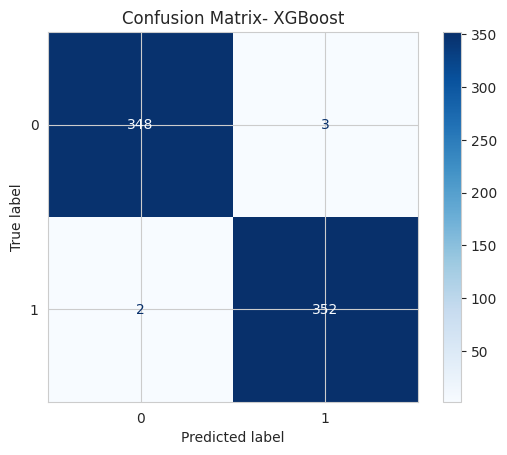

In [41]:
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix- XGBoost")
plt.show()

Performance Analysis

1. High Accuracy: The model performs well with very few misclassifications.

2. Low False Positive Rate (FPR): Only 3 out of 353 actual negatives were incorrectly classified.

3. Low False Negative Rate (FNR): Only 2 out of 354 actual positives were misclassified.

4. Balanced Classification: The class distribution seems balanced with similar numbers of true positives and true negatives.

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

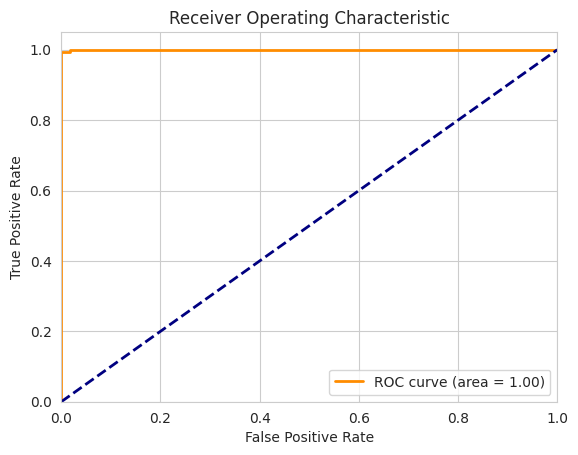

In [43]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Scale data for LSTM
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Make predictions
lstm_predictions = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int)

# Evaluate the model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
print(f"Training Accuracy: {lstm_accuracy}")
print(classification_report(y_test, lstm_predictions))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5179 - loss: 0.6919 - val_accuracy: 0.5021 - val_loss: 0.6934
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5367 - loss: 0.6858 - val_accuracy: 0.5064 - val_loss: 0.6863
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5300 - loss: 0.6800 - val_accuracy: 0.5220 - val_loss: 0.6673
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5903 - loss: 0.6446 - val_accuracy: 0.7702 - val_loss: 0.5782
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.5589 - val_accuracy: 0.7475 - val_loss: 0.4640
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.4233 - val_accuracy: 0.8766 - val_loss: 0.3393
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8707 - loss: 0.3333 - val_accuracy: 0.9745 - val_loss: 0.2499
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9128 - loss: 0.2605 - val_accuracy: 0.9035 - val_loss: 0.2398
Ep

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation scores
lstm_cv_scores = []

# Perform cross-validation
for train_index, test_index in kfold.split(X):
    # Get data for current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for LSTM
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Reshape data for LSTM
    X_train_fold_reshaped = X_train_fold_scaled.reshape(X_train_fold_scaled.shape[0], 1, X_train_fold_scaled.shape[1])
    X_test_fold_reshaped = X_test_fold_scaled.reshape(X_test_fold_scaled.shape[0], 1, X_test_fold_scaled.shape[1])

    # Train the model
    lstm_model.fit(X_train_fold_reshaped, y_train_fold, epochs=20, batch_size=32, verbose=0)  # Suppress verbose output

    # Make predictions
    lstm_predictions_fold = (lstm_model.predict(X_test_fold_reshaped) > 0.5).astype(int)

    # Calculate accuracy for current fold
    accuracy_fold = accuracy_score(y_test_fold, lstm_predictions_fold)

    # Store the accuracy
    lstm_cv_scores.append(accuracy_fold)

# Print the cross-validation scores
print("LSTM Cross-Validation Scores:", lstm_cv_scores)
print("LSTM Mean Accuracy:", np.mean(lstm_cv_scores))
print("LSTM Accuracy Standard Deviation:", np.std(lstm_cv_scores))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
LSTM Cross-Validation Scores: [0.9900709219858156, 0.9886363636363636, 0.9914772727272727, 0.9928977272727273, 0.9815340909090909]
LSTM Mean Accuracy: 0.988923275306254
LSTM Accuracy Standard Deviation: 0.003957742501049801


In [46]:
!pip install tensorflow

In [47]:
import tensorflow as tf

<ipython-input-48-e14994ea98dc>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_full, y_val_fold = y[train_index], y[val_index]


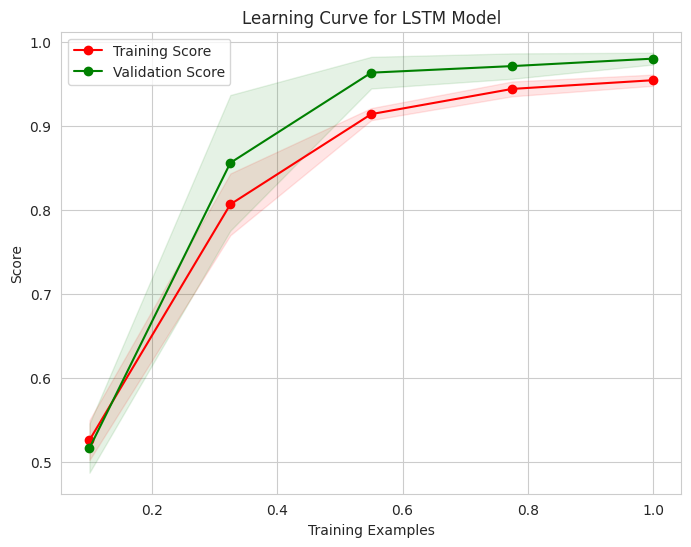

In [48]:
def learning_curve_keras(model, X, y, cv=5, scoring="accuracy", epochs=20, batch_size=32):
    """
    Generate a learning curve for a Keras model using KFold cross-validation.

    Args:
        model: The compiled Keras model.
        X: The input data.
        y: The target data.
        cv: The number of folds for cross-validation.
        scoring: The scoring metric to use.
        epochs: The number of epochs to train for.
        batch_size: The batch size for training.

    Returns:
        train_sizes: The training set sizes used.
        train_scores: The training scores for each fold and training size.
        val_scores: The validation scores for each fold and training size.
    """

    train_sizes = np.linspace(0.1, 1.0, 5)  # 10% to 100% of the training set
    train_scores = []
    val_scores = []

    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    for train_index, val_index in kfold.split(X):
        X_train_full, X_val_fold = X[train_index], X[val_index]
        y_train_full, y_val_fold = y[train_index], y[val_index]

        fold_train_scores = []
        fold_val_scores = []

        for size in train_sizes:
            subset_size = int(size * len(X_train_full))
            X_train_fold, y_train_fold = X_train_full[:subset_size], y_train_full[:subset_size]

            # Clone model to prevent weight leakage
            model_clone = tf.keras.models.clone_model(model)
            model_clone.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Train the model
            history = model_clone.fit(
                X_train_fold, y_train_fold,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_val_fold, y_val_fold),
                verbose=0
            )

            # Store final epoch scores
            fold_train_scores.append(history.history[scoring][-1])
            fold_val_scores.append(history.history[f'val_{scoring}'][-1])

        train_scores.append(fold_train_scores)
        val_scores.append(fold_val_scores)

    return train_sizes, np.array(train_scores), np.array(val_scores)


# Call function
train_sizes, train_scores, val_scores = learning_curve_keras(lstm_model, X_train_reshaped, y_train, cv=5, scoring="accuracy")

# Compute means and standard deviations across folds
train_mean = np.mean(train_scores, axis=0)
train_std = np.std(train_scores, axis=0)
val_mean = np.mean(val_scores, axis=0)
val_std = np.std(val_scores, axis=0)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, val_mean, 'o-', color="g", label="Validation Score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve for LSTM Model")
plt.legend()
plt.grid(True)
plt.show()


The model learns effectively as more data is provided.

No significant overfitting, as training and validation scores remain close.

Good generalization, with validation performance nearly matching training performance at larger sample sizes.

Variance is higher at smaller dataset sizes, meaning the model might struggle with small datasets.

In [49]:
accuracies = {
    'Model': ['XGBoost', 'LSTM'],
    'Training Accuracy': [training_accuracy, lstm_accuracy],  # Replace None with LSTM training accuracy if available
    'Test Accuracy': [accuracy, lstm_accuracy]
}

accuracy_table = pd.DataFrame(accuracies)
print(accuracy_table)

     Model  Training Accuracy  Test Accuracy
0  XGBoost           0.999645       0.992908
1     LSTM           0.967376       0.967376


In [50]:
# Prepare the data for the forecast by Select the last 14 days of data for prediction
last_14_days_data = pg_data.tail(14)

# Select the features for prediction
forecast_features = last_14_days_data[["Close", "High", "Low", "Open", "Volume", "Return"]]

# initialize and fit the XGBoost model
X = pg_data[["Close", "High", "Low", "Open", "Volume", "Return"]]
y = pg_data["Stocks_Direction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

# Initialize and train the XGBoost model (
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Use the same scaler as before (StandardScaler for XGBoost)
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the features using the fitted scaler
forecast_features_scaled = scaler.transform(forecast_features)

# Make predictions for the next 14 days
forecast_predictions = xgb_model.predict(forecast_features_scaled)

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({'Date': last_14_days_data.index, 'Stocks_Direction': forecast_predictions})

# Print the forecast
print(forecast_df)

          Date  Stocks_Direction
0   2024-02-06                 1
1   2024-02-07                 1
2   2024-02-08                 0
3   2024-02-09                 0
4   2024-02-12                 0
5   2024-02-13                 0
6   2024-02-14                 0
7   2024-02-15                 1
8   2024-02-16                 1
9   2024-02-20                 1
10  2024-02-21                 1
11  2024-02-22                 1
12  2024-02-23                 1
13  2024-02-26                 0


In [51]:
# ... (Your LSTM model initialization and data preparation) ...

# Initialize KFold (same as for XGBoost)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store CV scores
lstm_cv_train_scores = []
lstm_cv_test_scores = []

with mlflow.start_run():
    for fold, (train_index, test_index) in enumerate(kfold.split(X)):
        # Get data for current fold
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Scale data for LSTM (using the same scaler if possible)
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_test_fold_scaled = scaler.transform(X_test_fold)

        # Reshape data for LSTM
        X_train_fold_reshaped = X_train_fold_scaled.reshape(X_train_fold_scaled.shape[0], 1, X_train_fold_scaled.shape[1])
        X_test_fold_reshaped = X_test_fold_scaled.reshape(X_test_fold_scaled.shape[0], 1, X_test_fold_scaled.shape[1])

        # Train the LSTM model for the current fold
        lstm_model_fold = tf.keras.models.clone_model(lstm_model)  # Clone the original model
        lstm_model_fold.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        lstm_model_fold.fit(X_train_fold_reshaped, y_train_fold, epochs=20, batch_size=32, verbose=0)

        # Predict and evaluate (adjust for LSTM output)
        y_train_pred_fold = (lstm_model_fold.predict(X_train_fold_reshaped) > 0.5).astype(int)
        y_test_pred_fold = (lstm_model_fold.predict(X_test_fold_reshaped) > 0.5).astype(int)

        # Calculate and store CV scores
        train_accuracy_fold = accuracy_score(y_train_fold, y_train_pred_fold)
        test_accuracy_fold = accuracy_score(y_test_fold, y_test_pred_fold)
        lstm_cv_train_scores.append(train_accuracy_fold)
        lstm_cv_test_scores.append(test_accuracy_fold)

        # Log fold-specific metrics
        mlflow.log_metric(f"lstm_fold_{fold}_train_accuracy", train_accuracy_fold)
        mlflow.log_metric(f"lstm_fold_{fold}_test_accuracy", test_accuracy_fold)
        # ... (Log other fold-specific metrics if needed, like classification report) ...

    # Log overall CV metrics (mean and std)
    mlflow.log_metric("lstm_cv_mean_train_accuracy", np.mean(lstm_cv_train_scores))
    mlflow.log_metric("lstm_cv_std_train_accuracy", np.std(lstm_cv_train_scores))
    mlflow.log_metric("lstm_cv_mean_test_accuracy", np.mean(lstm_cv_test_scores))
    mlflow.log_metric("lstm_cv_std_test_accuracy", np.std(lstm_cv_test_scores))

    # ... (Log other overall metrics and the final LSTM model if desired) ...

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [52]:
# ... (Your XGBoost model initialization and data preparation) ...

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store CV scores
xgb_cv_train_scores = []
xgb_cv_test_scores = []

with mlflow.start_run():
    for fold, (train_index, test_index) in enumerate(kfold.split(X)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Train the XGBoost model for the current fold
        xgb_model_fold = XGBClassifier(random_state=42)  # Consider fold-specific params if needed
        xgb_model_fold.fit(X_train_fold, y_train_fold)

        # Predict and evaluate
        y_train_pred_fold = xgb_model_fold.predict(X_train_fold)
        y_test_pred_fold = xgb_model_fold.predict(X_test_fold)

        train_accuracy_fold = accuracy_score(y_train_fold, y_train_pred_fold)
        test_accuracy_fold = accuracy_score(y_test_fold, y_test_pred_fold)

        # Store CV scores
        xgb_cv_train_scores.append(train_accuracy_fold)
        xgb_cv_test_scores.append(test_accuracy_fold)

        # Log fold-specific metrics
        mlflow.log_metric(f"xgboost_fold_{fold}_train_accuracy", train_accuracy_fold)
        mlflow.log_metric(f"xgboost_fold_{fold}_test_accuracy", test_accuracy_fold)
        # ... (Log other fold-specific metrics if needed) ...

        class_report_fold = classification_report(y_test_fold, y_test_pred_fold, output_dict=True)
        for class_label, metrics in class_report_fold.items():
            if isinstance(metrics, dict):
                for metric_name, metric_value in metrics.items():
                    mlflow.log_metric(f"xgboost_fold_{fold}_{class_label}_{metric_name}", metric_value)
            else:
                mlflow.log_metric(f"xgboost_fold_{fold}_{class_label}", metrics)
    # Log overall CV metrics (mean and std)
    mlflow.log_metric("xgboost_cv_mean_train_accuracy", np.mean(xgb_cv_train_scores))
    mlflow.log_metric("xgboost_cv_std_train_accuracy", np.std(xgb_cv_train_scores))
    mlflow.log_metric("xgboost_cv_mean_test_accuracy", np.mean(xgb_cv_test_scores))
    mlflow.log_metric("xgboost_cv_std_test_accuracy", np.std(xgb_cv_test_scores))

    # ... (Log other overall metrics and the final XGBoost model) ...

In [53]:
import mlflow
import mlflow.xgboost
import mlflow.keras

# Start an MLflow run
with mlflow.start_run():
    # ... (Your XGBoost model training code) ...
    #mlflow.xgboost.log_model(xgb_model, "xgboost-model")
    mlflow.xgboost.log_model(xgb_model, "xgboost-model", model_format="json")

    # ... (Your LSTM model training code) ...
    mlflow.keras.log_model(lstm_model, "lstm-model")

    # Log parameters and metrics
    mlflow.log_param("xgboost_learning_rate", 0.1)
    mlflow.log_metric("xgboost_accuracy", xgb_accuracy)
    mlflow.log_param("lstm_epochs", 20)
    mlflow.log_metric("lstm_accuracy", lstm_accuracy)

2025/02/28 08:36:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/28 08:36:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/28 08:36:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [54]:
from pyngrok import ngrok
#terminate open tunnels if exist
ngrok.kill()

# setting the authtoken (optional)
# get your authtoken from https//:dashboard.ngrok.com/auth

NGROK_AUTH_TOKEN = "2tcpdOLskq1Wk0nzAKI12UtvQ7Y_NEAzaER9D4vA7FC1kM3M"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# open an HTTPS tunnel on port 5000 for http://localhost:5000
public_url = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", public_url)

mlflow.set_experiment("Stock_Market_Experiment")

# Open an HTTPs tunnel on port

2025/02/28 08:36:12 INFO mlflow.tracking.fluent: Experiment with name 'Stock_Market_Experiment' does not exist. Creating a new experiment.


MLflow Tracking UI: NgrokTunnel: "https://585f-35-237-190-14.ngrok-free.app" -> "http://localhost:5000"


<Experiment: artifact_location='file:///content/mlruns/353075060134784171', creation_time=1740731772931, experiment_id='353075060134784171', last_update_time=1740731772931, lifecycle_stage='active', name='Stock_Market_Experiment', tags={}>

In [ ]:
!mlflow ui

[2025-02-28 08:36:15 +0000] [14354] [INFO] Starting gunicorn 23.0.0
[2025-02-28 08:36:15 +0000] [14354] [INFO] Listening at: http://127.0.0.1:5000 (14354)
[2025-02-28 08:36:15 +0000] [14354] [INFO] Using worker: sync
[2025-02-28 08:36:15 +0000] [14355] [INFO] Booting worker with pid: 14355
[2025-02-28 08:36:15 +0000] [14356] [INFO] Booting worker with pid: 14356
[2025-02-28 08:36:15 +0000] [14360] [INFO] Booting worker with pid: 14360
[2025-02-28 08:36:15 +0000] [14362] [INFO] Booting worker with pid: 14362
